<a href="https://colab.research.google.com/github/pranit570/combineit1n2/blob/master/combineit1n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [1]:
!git clone https://github.com/pranit570/combineit1n2
  

Cloning into 'combineit1n2'...
remote: Enumerating objects: 7097, done.
remote: Counting objects: 100% (7097/7097), done.
remote: Compressing objects: 100% (7096/7096), done.
remote: Total 7097 (delta 0), reused 7097 (delta 0), pack-reused 0
Receiving objects: 100% (7097/7097), 88.08 MiB | 41.62 MiB/s, done.


In [2]:
!ls combineit1n2


driving_log.csv  IMG  README.md


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random

Using TensorFlow backend.


In [4]:
datadir = 'combineit1n2'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\center_2019_09_15_11_23_59_120.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\left_2019_09_15_11_23_59_120.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\right_2019_09_15_11_23_59_120.jpg,0.0,0.0,0.0,0.000078
1,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\center_2019_09_15_11_23_59_228.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\left_2019_09_15_11_23_59_228.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\right_2019_09_15_11_23_59_228.jpg,0.0,0.0,0.0,0.000078
2,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\center_2019_09_15_11_23_59_334.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\left_2019_09_15_11_23_59_334.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\right_2019_09_15_11_23_59_334.jpg,0.0,0.0,0.0,0.000078
3,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\center_2019_09_15_11_23_59_436.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\left_2019_09_15_11_23_59_436.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\right_2019_09_15_11_23_59_436.jpg,0.0,0.0,0.0,0.000078
4,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\center_2019_09_15_11_23_59_538.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\left_2019_09_15_11_23_59_538.jpg,C:\1jan2019pranitlenovo\data\mtechparul\final year dissertation\data\readymaderun\iteration1forwardpass\IMG\right_2019_09_15_11_23_59_538.jpg,0.0,0.0,0.0,0.000078


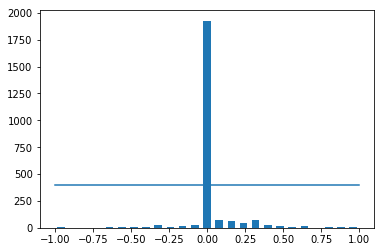

In [5]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

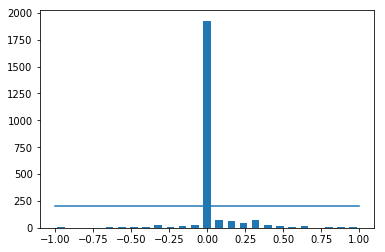

In [6]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 2364
removed: 1727
remaining: 637


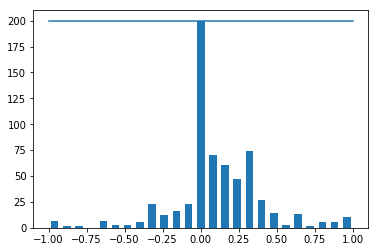

In [7]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [8]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]

center      center_2019_09_15_11_24_01_957.jpg
left        left_2019_09_15_11_24_01_957.jpg  
right       right_2019_09_15_11_24_01_957.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       7.77e-05                          
Name: 27, dtype: object


In [9]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2019_09_15_11_24_01_957.jpg
left        left_2019_09_15_11_24_01_957.jpg  
right       right_2019_09_15_11_24_01_957.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       7.77e-05                          
Name: 27, dtype: object


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1528
Valid Samples: 383


Text(0.5, 1.0, 'Validation set')

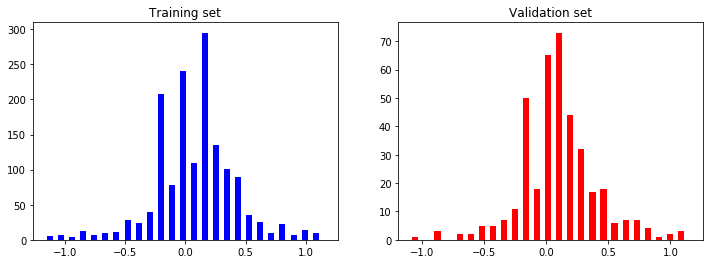

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [0]:
def img_preprocess (img):
    img = mpimg.imread(img)
    return img

Text(0.5, 1.0, 'processed Image')

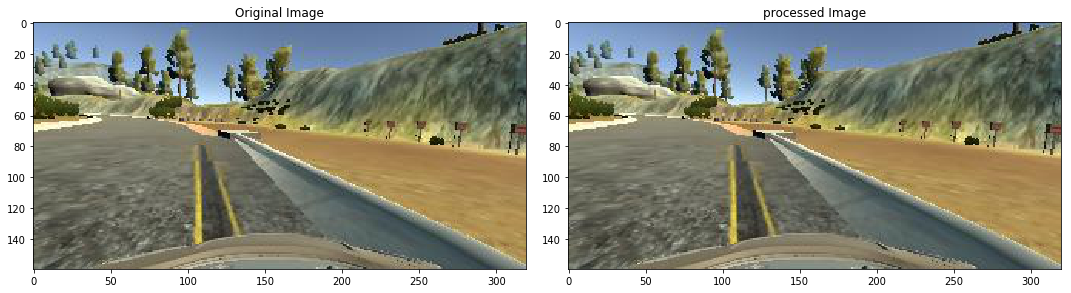

In [13]:
image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout() 

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(original_image)
axs[1].set_title('processed Image')

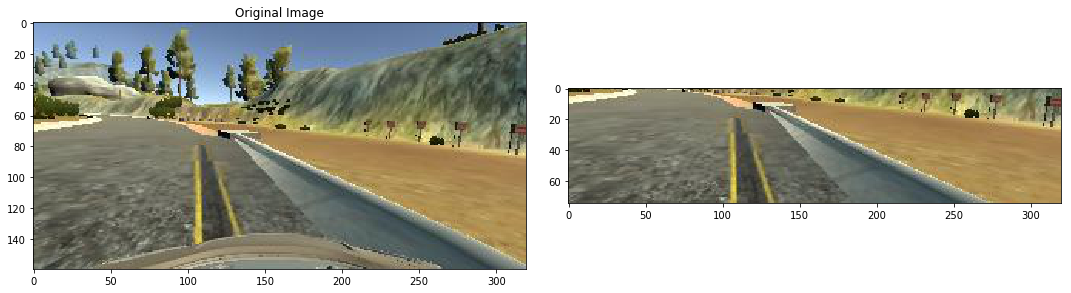

In [14]:
def img_preprocess (img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    return img

image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout() 

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(preprocessed_image)

Text(0.5, 1.0, 'processed Image')

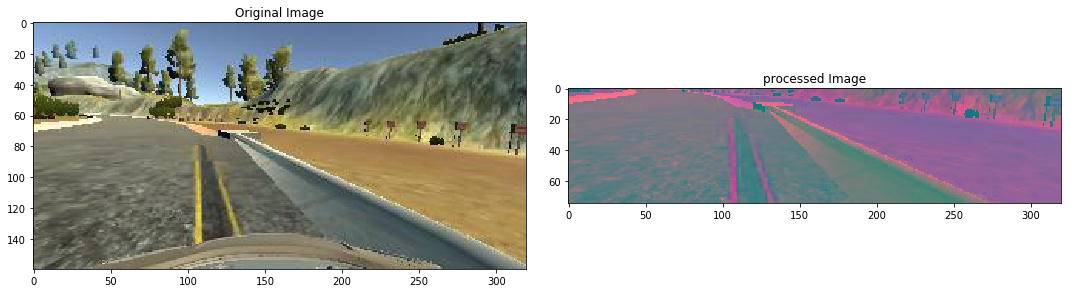

In [15]:
def img_preprocess (img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return img

image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout() 

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(preprocessed_image)
axs[1].set_title('processed Image')

Text(0.5, 1.0, 'processed Image')

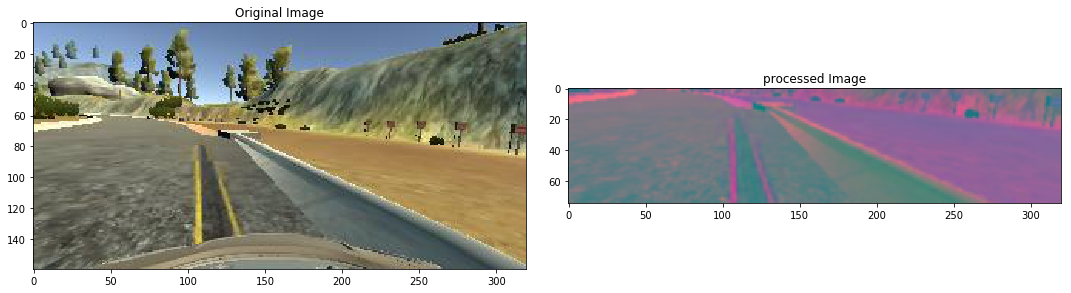

In [16]:
def img_preprocess (img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    return img

image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout() 

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(preprocessed_image)
axs[1].set_title('processed Image')

Text(0.5, 1.0, 'processed Image')

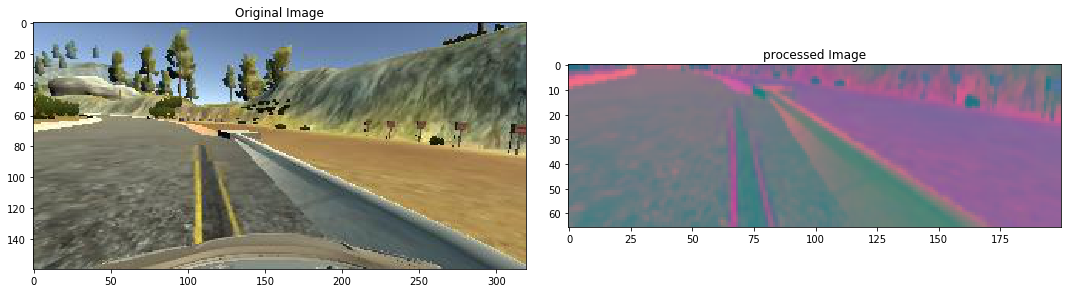

In [17]:
def img_preprocess (img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout() 

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(preprocessed_image)
axs[1].set_title('processed Image')

In [0]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

In [19]:
plt.imshow

<function matplotlib.pyplot.imshow>

TypeError: ignored

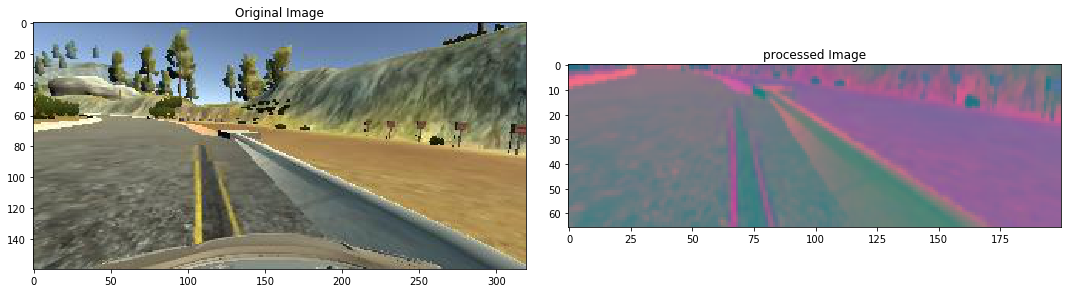

In [20]:
def img_preprocess (img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout() 

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(preprocessed_image)
axs[1].set_title('processed Image')

X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

Text(0.5, 1.0, 'processed Image')

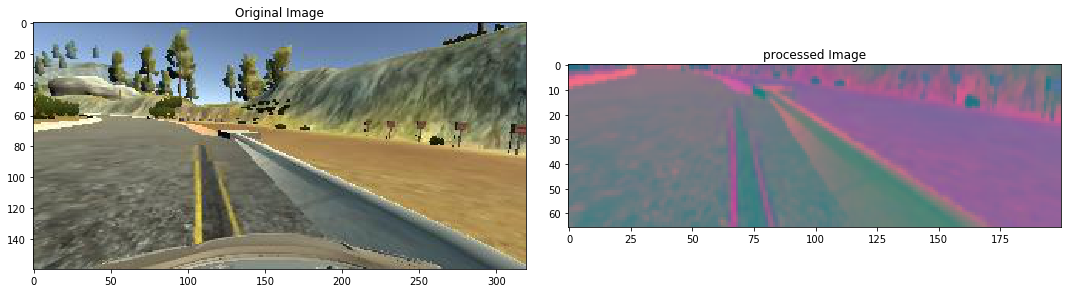

In [21]:
def img_preprocess (img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout() 

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(preprocessed_image)
axs[1].set_title('processed Image')

In [22]:
X_train = np.array(list(map(img_preprocess, X_train)))

TypeError: ignored

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
X_train = np.array(list(map(img_preprocess, X_train)))

Training Samples: 1528
Valid Samples: 383


In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(1528, 66, 200, 3)


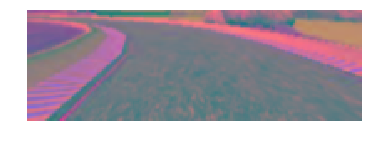

In [25]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

(1528, 66, 200, 3)


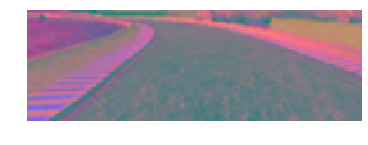

In [26]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)


In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='relu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(64, 3, 3, activation='relu'))  
  model.add(Convolution2D(64, 3, 3, activation='relu'))
#   model.add(Dropout(0.5))  
  model.add(Flatten())  
  model.add(Dense(100, activation = 'relu'))
#   model.add(Dropout(0.5))  
  model.add(Dense(50, activation = 'relu'))
#   model.add(Dropout(0.5))  
  model.add(Dense(10, activation = 'relu'))
#   model.add(Dropout(0.5)) 
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [28]:
model = nvidia_model()
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3),

In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle = 1)



Train on 1528 samples, validate on 383 samples
Epoch 1/30
1528/1528 [==============================] - 12s 8ms/step - loss: 0.1125 - val_loss: 0.0970
Epoch 2/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1075 - val_loss: 0.0895
Epoch 3/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.0908 - val_loss: 0.0675
Epoch 4/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.0829 - val_loss: 0.0651
Epoch 5/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.0805 - val_loss: 0.0729
Epoch 6/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.0816 - val_loss: 0.0666
Epoch 7/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.0774 - val_loss: 0.0658
Epoch 8/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.0729 - val_loss: 0.0632
Epoch 9/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.0701 - val_loss: 0.0590
Epoch 10/30
1528/1528 [=

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

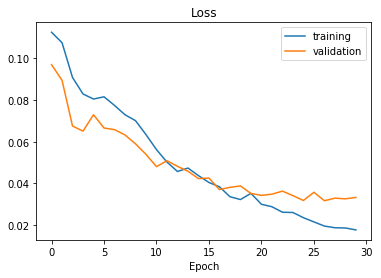

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='relu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(64, 3, 3, activation='relu'))  
  model.add(Convolution2D(64, 3, 3, activation='relu'))
  model.add(Dropout(0.5))  
  model.add(Flatten())  
  model.add(Dense(100, activation = 'relu'))
  model.add(Dropout(0.5))  
  model.add(Dense(50, activation = 'relu'))
  model.add(Dropout(0.5))  
  model.add(Dense(10, activation = 'relu'))
  model.add(Dropout(0.5)) 
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [32]:
model = nvidia_model()
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3),

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle = 1)

Train on 1528 samples, validate on 383 samples
Epoch 1/30
1528/1528 [==============================] - 12s 8ms/step - loss: 0.1154 - val_loss: 0.0993
Epoch 2/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1112 - val_loss: 0.0978
Epoch 3/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1096 - val_loss: 0.0959
Epoch 4/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1090 - val_loss: 0.0951
Epoch 5/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1099 - val_loss: 0.0950
Epoch 6/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1084 - val_loss: 0.0939
Epoch 7/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1084 - val_loss: 0.0942
Epoch 8/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1075 - val_loss: 0.0924
Epoch 9/30
1528/1528 [==============================] - 11s 7ms/step - loss: 0.1069 - val_loss: 0.0880
Epoch 10/30
1528/1528 [===

Text(0.5, 0, 'Epoch')

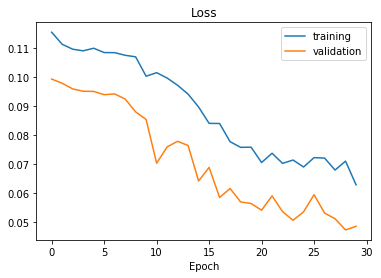

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
model.save('combine1n2.h5')

In [0]:
from google.colab import files

In [0]:
files.download('combine1n2.h5')